### Title: Damage Detection using Convolutional Neural Networks

### Summary: This project aimed to develop a convolutional neural network (CNN) model for damage detection in images. It utilized a dataset consisting of images of damaged and undamaged items. After preprocessing the data, a CNN model with convolutional and dense layers was constructed using TensorFlow's Keras API. The model was trained on the training set and evaluated on the test set, achieving remarkable accuracy. The performance was further assessed using metrics like accuracy score, confusion matrix, and classification report, demonstrating the effectiveness of the developed model in accurately detecting damage in images.








### Import necessary libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import glob

### Fetch the Training data

In [7]:
damage = glob.glob('train_another/damage/*.jpeg')
no_damage = glob.glob('train_another/no_damage/*.jpeg'

### Fetch the Testing data

In [8]:
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

### Check the datatype of Training and Testing Set

In [9]:
print("Datatype of Training set, Damage:", type(damage),",No Damage:",type(no_damage))
print("Datatype of Testing set, Damage:", type(damage_test),",No_Damage:",type(no_damage_test))

Datatype of Training set, Damage: <class 'list'> ,No Damage: <class 'list'>
Datatype of Testing set, Damage: <class 'list'> ,No_Damage: <class 'list'>


### Find the number of images of all classes in the Training set

In [10]:
print("Number of images in Training are, Damage:",len(damage),",No Damage:",len(no_damage))

Number of images in Training are, Damage: 5000 ,No Damage: 5000


### Find the number of images of all classes in the testing set

In [11]:
print("Number of images in Training are, Damage:",len(damage_test),",No Damage:",len(no_damage_test))

Number of images in Training are, Damage: 8000 ,No Damage: 1000


### Store all the images inside a list and create a list with the corresponding labels


### For Training set

In [12]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    

### For Testing set

In [13]:
image_test = []
label_test = []

for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

    
for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    

### Shuffle both image list and label list (In both Training and testing set)

In [14]:
image, label = shuffle(image,label, random_state = 100)

In [15]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

In [47]:
len(image)

10000

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

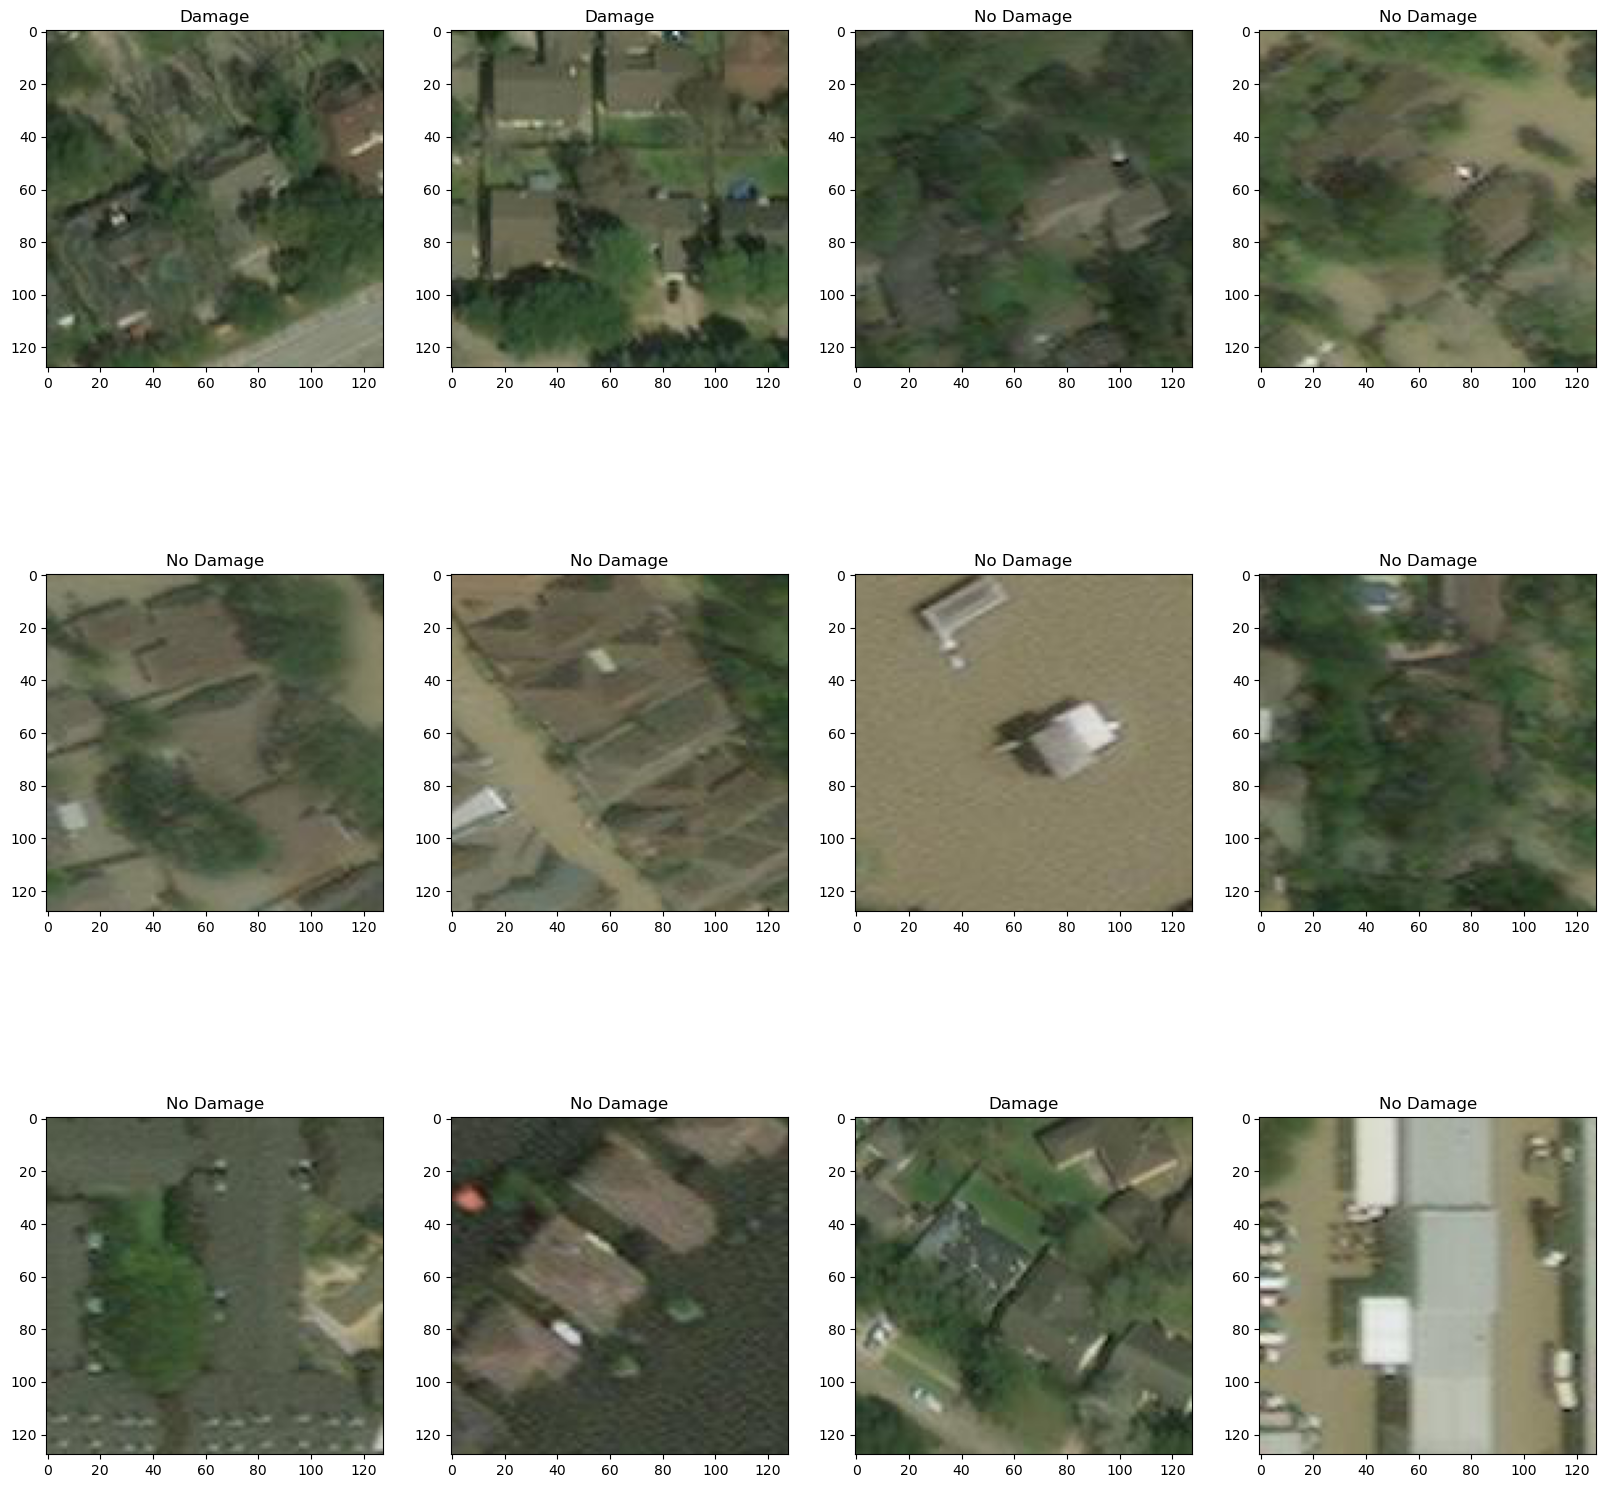

In [16]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('Damage')
    else:
        plt.title('No Damage')

### Resize the images to 64X64

### For Training set

In [17]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

### For Testing set

In [18]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [20]:
y_train = np.array(label)

In [21]:
y_test = np.array(label_test)

### Plot some of the resized images

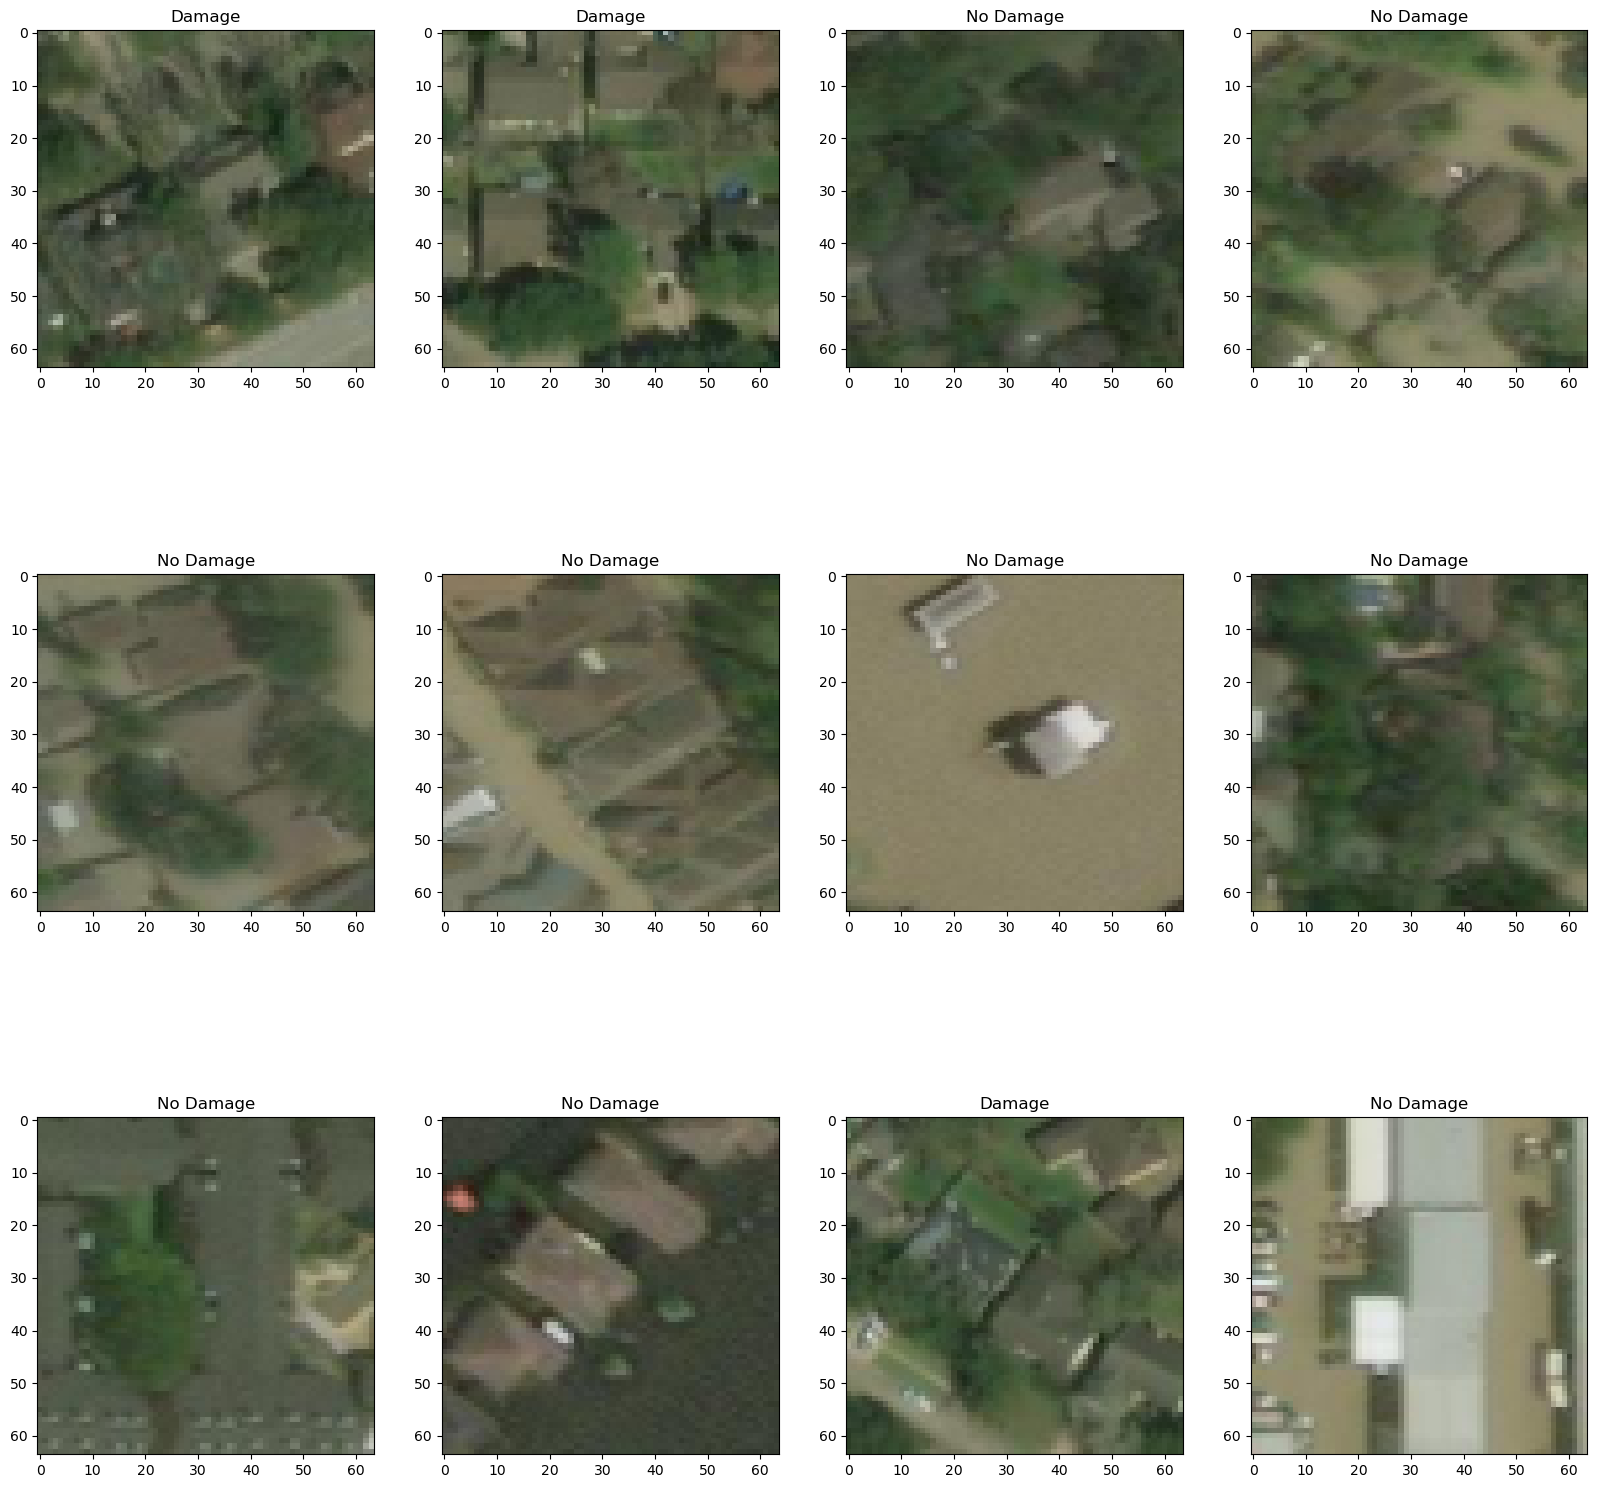

In [22]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if y_train[i] == 1:
        plt.title('Damage')
    else:
        plt.title('No Damage')

### Check the shape of X_train and X_test and y_train and y_test

In [23]:
print('Shape of X_train is:',X_train.shape)
print('Shape of X_test is:',X_test.shape)
print('Shape of y_train is:',y_train.shape)
print('Shape of y_test is:',y_train.shape)

Shape of X_train is: (10000, 64, 64, 3)
Shape of X_test is: (16000, 64, 64, 3)
Shape of y_train is: (10000,)
Shape of y_test is: (10000,)


### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [48]:
model = keras.models.Sequential([
    keras.layers.Conv2D(10, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile our model

In [49]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

### Check model summary

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 32)          │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │         752,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 756,073 (2.88 MB)

 Trainable params: 756,073 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [53]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9370 - val_loss: 0.2843
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9886 - loss: 0.0311 - val_accuracy: 0.9415 - val_loss: 0.2464
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9997 - loss: 0.0038 - val_accuracy: 0.9370 - val_loss: 0.2883
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9861 - loss: 0.0388 - val_accuracy: 0.9395 - val_loss: 0.2852
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9405 - val_loss: 0.2863
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 1.0000 - loss: 6.9174e-04 - val_accuracy: 0.9405 - val_loss: 0.3237
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9998 - loss: 0.0041 - val_accuracy: 0.9375 - val_loss: 0.2924
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 1.0000 - loss: 9.5559e-04 - 

### Evaluate the model

In [54]:
model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0119


[0.057273607701063156, 0.9865999817848206]

### Make predictions with X_test

In [55]:
y_pred = model.predict(X_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [56]:
y_pred=[np.argmax(i) for i in y_pred]

In [57]:
y_test=[np.argmax(i) for i in y_test]

### Our prediction is numbers ranging from 0 to 1. We can convert values less than 0.5 to 0 and rest to 1.

In [58]:
pred = []

for i in y_pred:
    if i > 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [59]:
pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Plot X_test along with label from our prediction

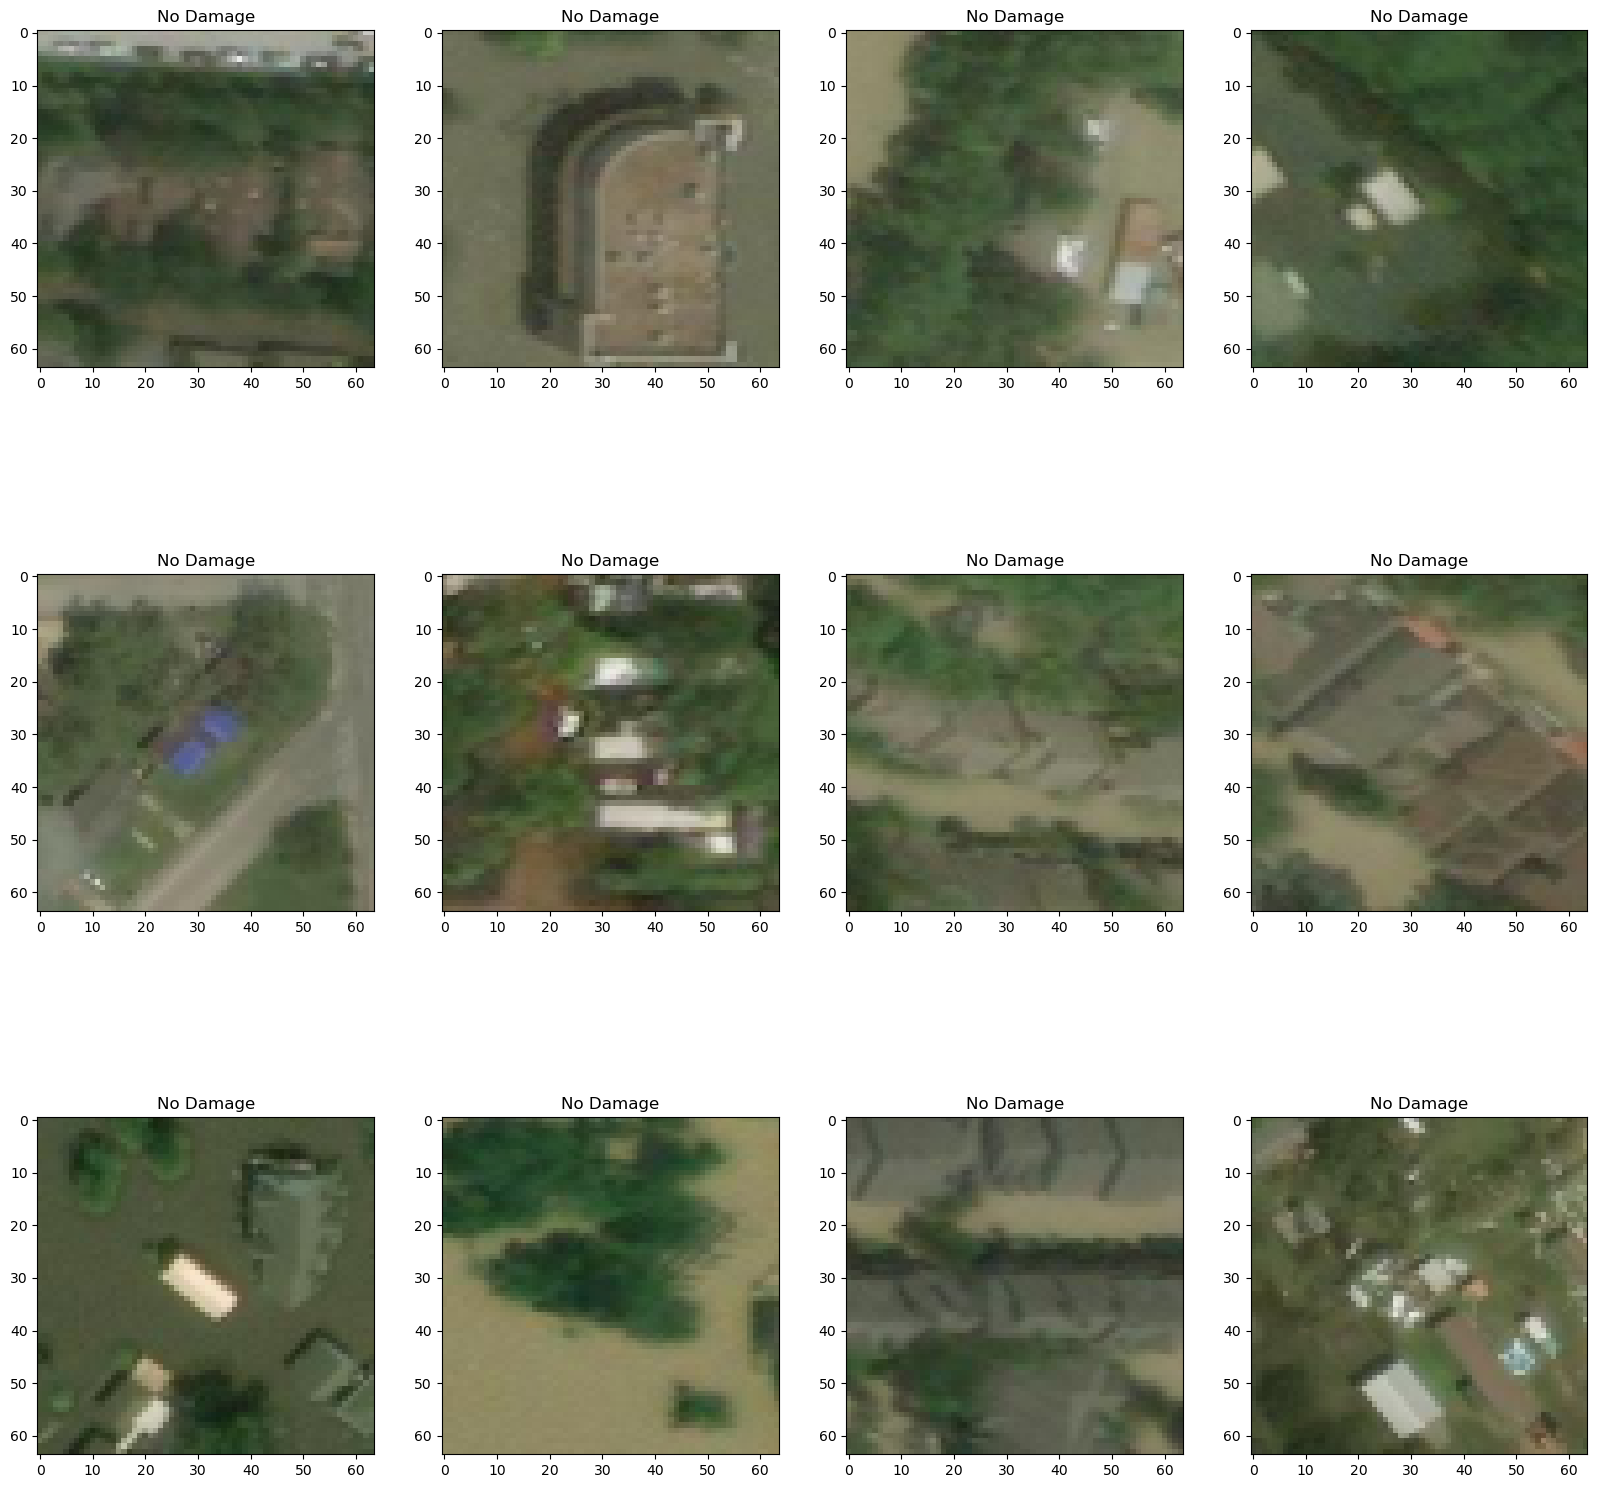

In [60]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

### Check Accuracy Score

In [61]:
accuracy_score(y_pred,y_test)

1.0

### Plot a confusion matrix on heatmap

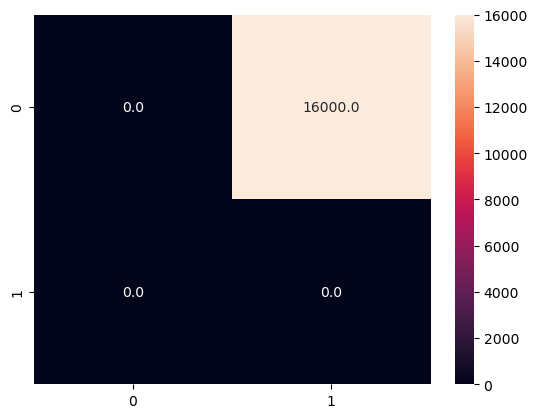

In [62]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='.1f')
plt.show()

### Print Classification Report

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16000

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

